In [1]:
# Add Matplotlib inline magic command
%matplotlib inline

# Dependencies and Setup
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statistics 

In [2]:
# Files to load
city_data_to_load = os.path.join("Resources","city_data.csv")
ride_data_to_load = os.path.join("Resources","ride_data.csv")

# Read the city data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.count()


city            120
driver_count    120
type            120
dtype: int64

In [3]:
# Read the ride data file and store it in a pandas DataFrame.
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2375 entries, 0 to 2374
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   city     2375 non-null   object 
 1   date     2375 non-null   object 
 2   fare     2375 non-null   float64
 3   ride_id  2375 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 74.3+ KB


In [4]:
# Get the number of data points from the Urban cities.
sum(city_data_df["type"]=="Urban")

66

In [5]:
# Get the columns and the rows that are not null.
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [6]:
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [7]:
pyber_summary_df = pyber_data_df.groupby(pyber_data_df["city"]).agg({"fare":"mean","ride_id":"count"})
pyber_summary_df = pd.merge(pyber_summary_df, city_data_df, how="left", on=["city", "city"])
pyber_summary_df.rename(columns={"ride_id":"rides", "driver_count":"drivers", "fare":"avg_fares"})

,city,avg_fares,rides,drivers,type
0,Amandaburgh,24.641667,18,12,Urban
1,Barajasview,25.332273,22,26,Urban
2,Barronchester,36.422500,16,11,Suburban
3,Bethanyland,32.956111,18,22,Suburban
4,Bradshawfurt,40.064000,10,7,Rural
...,...,...,...,...,...
115,West Robert,25.123871,31,39,Urban
116,West Samuelburgh,21.767600,25,73,Urban
117,Williamsonville,31.875000,14,2,Suburban
118,Williamsstad,24.362174,23,59,Urban


In [8]:
pyber_summary_df = pyber_summary_df.rename(columns={"ride_id":"rides", "driver_count":"drivers", "fare":"avg_fares"})

# Create the Urban, Suburban, and Rural city DataFrames.
urban_data = pyber_summary_df.loc[pyber_summary_df["type"]=="Urban"]
suburban_data = pyber_summary_df.loc[pyber_summary_df["type"]=="Suburban"]
rural_data = pyber_summary_df.loc[pyber_summary_df["type"]=="Rural"]


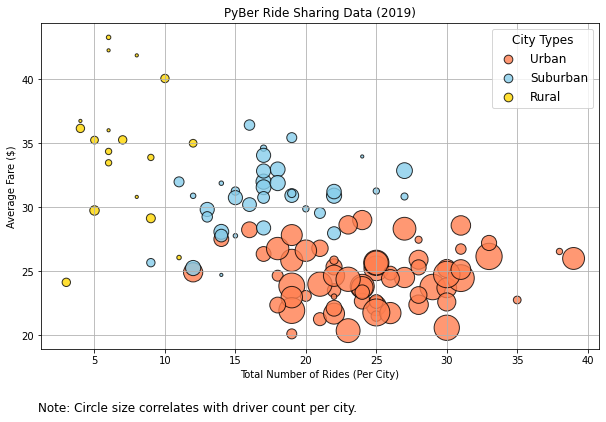

In [10]:
plt.subplots(figsize=(10, 6))

plt.scatter(urban_data["rides"], 
           urban_data["avg_fares"], 
           color="coral", 
           s=10*urban_data["drivers"], 
           label="Urban", 
           alpha=0.8,
           edgecolors="black", 
           linewidths=1)  

plt.scatter(suburban_data["rides"], 
           suburban_data["avg_fares"], 
           color="skyblue", 
           s=10*suburban_data["drivers"], 
           label="Suburban", 
           alpha=0.8,
           edgecolors="black", 
           linewidths=1)  

plt.scatter(rural_data["rides"], 
           rural_data["avg_fares"], 
           color="gold", 
           s=10*rural_data["drivers"], 
           label="Rural", 
           alpha=0.8,
           edgecolors="black", 
           linewidths=1)  

plt.title("PyBer Ride Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)

# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size.
plt.text(1,14, "Note: Circle size correlates with driver count per city.", fontsize="12")

# Save the figure.
plt.savefig("analysis/Fig1.png")

plt.show()